In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
space=pd.read_csv('space_server.csv')
space

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
space.isnull().values.any()

False

no null values are present in the dataset.

In [4]:
space.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [5]:
space['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

data is in classes of 3 therefore it is a classification type of problem statement.

In [6]:
space['camcol'].value_counts()

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64

In [7]:
space['objid'].isnull().sum()

0

# summary stats

In [8]:
space.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


# observation:
    huge difference in 75% and max values hence outliers are present.
    data is right side skewed as mean is greater than our median.

In [9]:
space['rerun'].value_counts()

301    10000
Name: rerun, dtype: int64

we can drop this columns as there is no use of it.

In [10]:
space.drop(['rerun'],axis=1,inplace=True)

# data analysis univariate

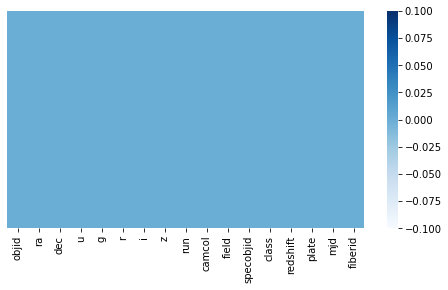

In [11]:
plt.figure(figsize=(8,4))
sns.heatmap(space.isnull(),yticklabels=False,cmap='Blues')

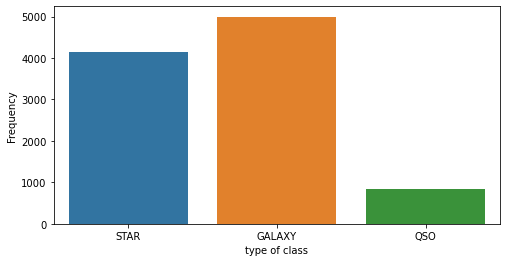

values as per the type GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


In [12]:
plt.figure(figsize=(8,4))
sns.countplot(x='class',data=space)
plt.ylabel('Frequency')
plt.xlabel('type of class')
plt.show()

print('values as per the type',space['class'].value_counts())

Galaxy has most the counts as per the data and QSO  has the least.

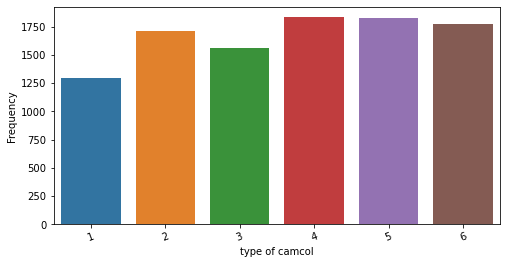

values as per the type 4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64


In [13]:
plt.figure(figsize=(8,4))
sns.countplot(x='camcol',data=space)
plt.ylabel('Frequency')
plt.xlabel('type of camcol')
plt.xticks(rotation=20)
plt.show()

print('values as per the type',space['camcol'].value_counts())

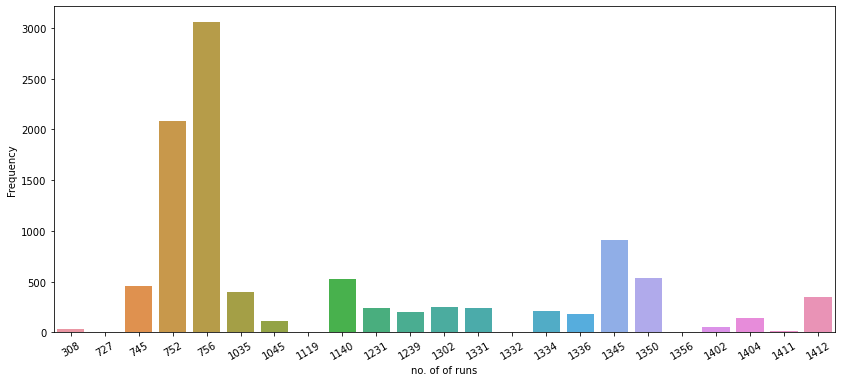

values as per the type 756     3060
752     2086
1345     915
1350     540
1140     527
745      453
1035     396
1412     347
1302     246
1331     245
1231     245
1334     212
1239     197
1336     182
1404     137
1045     112
1402      49
308       31
1411      10
1356       4
727        4
1119       1
1332       1
Name: run, dtype: int64


In [14]:
plt.figure(figsize=(14,6))
sns.countplot(x='run',data=space)
plt.ylabel('Frequency')
plt.xlabel('no. of of runs')
plt.xticks(rotation=30)
plt.show()

print('values as per the type',space['run'].value_counts())

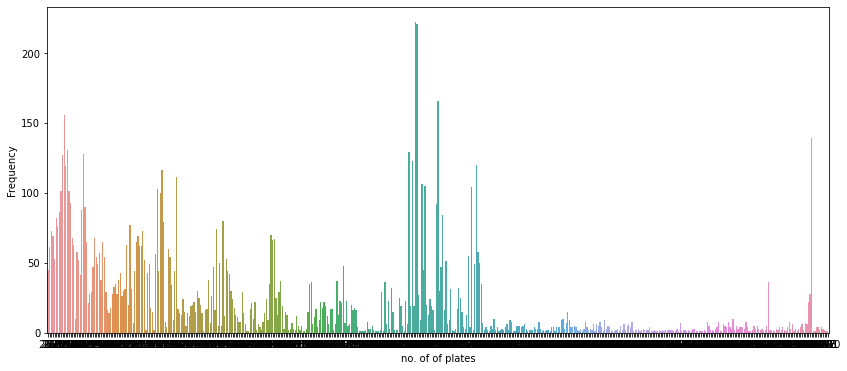

values as per the type 2558    222
2559    221
2895    166
276     156
7456    139
       ... 
7319      1
2952      1
7090      1
7562      1
1635      1
Name: plate, Length: 487, dtype: int64


In [15]:
plt.figure(figsize=(14,6))
sns.countplot(x='plate',data=space)
plt.ylabel('Frequency')
plt.xlabel('no. of of plates')
plt.show()

print('values as per the type',space['plate'].value_counts())

plate=2558 has received highest no. of counts.

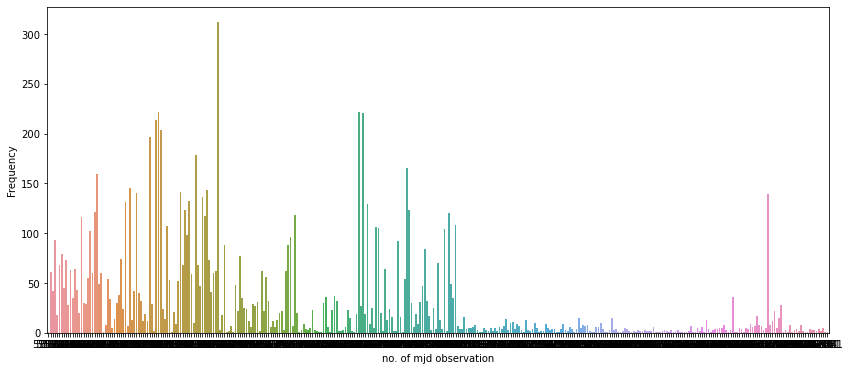

values as per the type 52000    312
54140    222
51909    222
54208    221
51908    214
        ... 
53299      1
55618      1
56991      1
51696      1
53053      1
Name: mjd, Length: 355, dtype: int64


In [16]:
plt.figure(figsize=(14,6))
sns.countplot(x='mjd',data=space)
plt.ylabel('Frequency')
plt.xlabel('no. of mjd observation')
plt.show()

print('values as per the type',space['mjd'].value_counts())

mjd observation 52000 received highest frequency or counts.

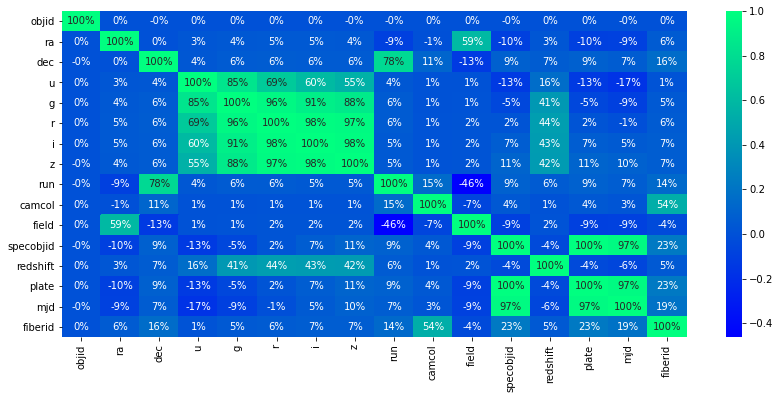

In [15]:
plt.figure(figsize=(14,6))
sns.heatmap(space.corr(),cmap='winter',fmt='.0%',annot=True)

field and run column have received negatively correlation.

# biviriate analysis

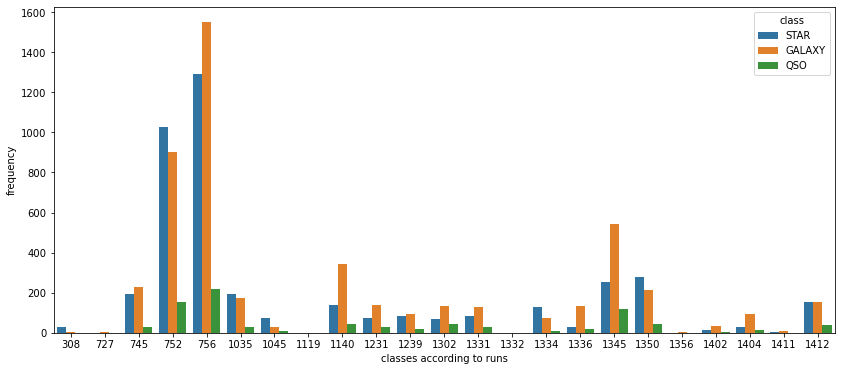

values as per the type run   class 
308   STAR       27
      GALAXY      4
727   GALAXY      3
      QSO         1
745   GALAXY    230
               ... 
1411  STAR        2
      QSO         1
1412  GALAXY    156
      STAR      153
      QSO        38
Name: class, Length: 62, dtype: int64


In [18]:
plt.figure(figsize=(14,6))
sns.countplot(x='run',hue='class',data=space)
plt.ylabel('frequency')
plt.xlabel('classes according to runs')
plt.show()

print('values as per the type',space.groupby('run')['class'].value_counts())

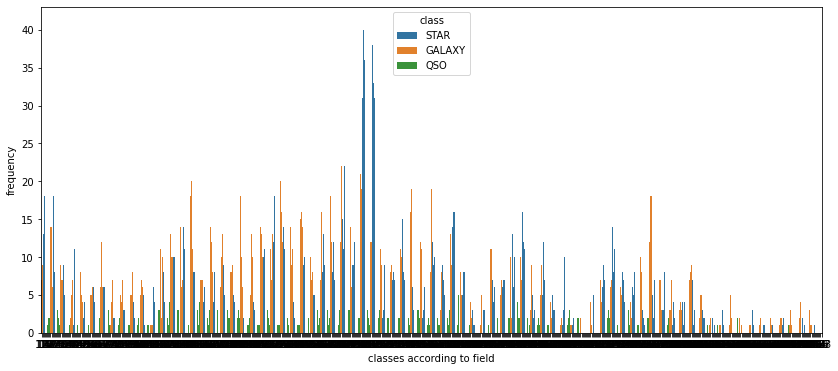

values as per the type field  class 
11     STAR      17
       GALAXY     7
12     STAR      12
       GALAXY     9
13     STAR      13
                 ..
764    GALAXY     1
765    STAR       4
766    STAR       3
767    STAR       5
768    STAR       3
Name: class, Length: 1743, dtype: int64


In [19]:
plt.figure(figsize=(14,6))
sns.countplot(x='field',hue='class',data=space)
plt.ylabel('frequency')
plt.xlabel('classes according to field')
plt.show()

print('values as per the type',space.groupby('field')['class'].value_counts())

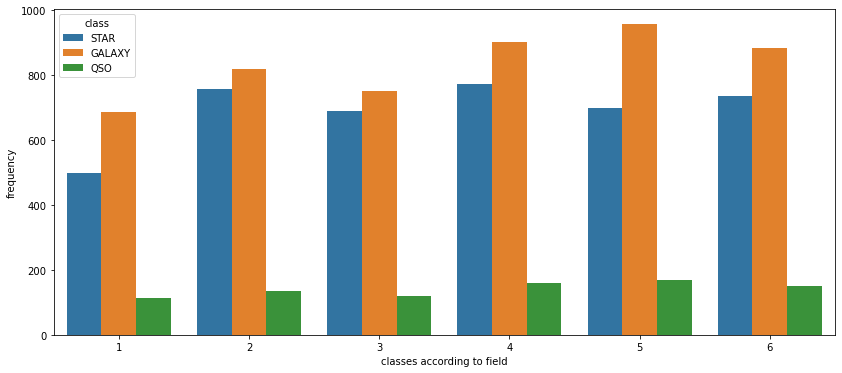

values as per the type camcol  class 
1       GALAXY    687
        STAR      497
        QSO       114
2       GALAXY    818
        STAR      758
        QSO       136
3       GALAXY    752
        STAR      690
        QSO       118
4       GALAXY    901
        STAR      772
        QSO       161
5       GALAXY    957
        STAR      700
        QSO       170
6       GALAXY    883
        STAR      735
        QSO       151
Name: class, dtype: int64


In [20]:
plt.figure(figsize=(14,6))
sns.countplot(x='camcol',hue='class',data=space)
plt.ylabel('frequency')
plt.xlabel('classes according to field')
plt.show()

print('values as per the type',space.groupby('camcol')['class'].value_counts())

camcol 5 have recieved highest no. of classes.

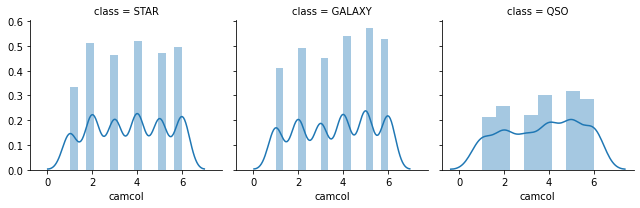

In [16]:
facet=sns.FacetGrid(space,col='class')
facet.map(sns.distplot,'camcol')

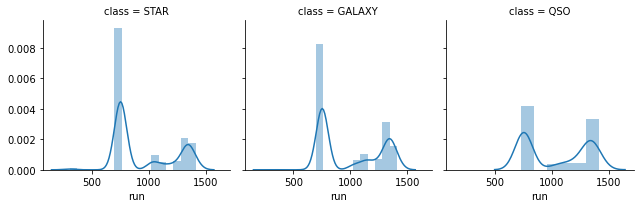

In [17]:
facet=sns.FacetGrid(space,col='class')
facet.map(sns.distplot,'run')

In [12]:
space.skew()

objid        0.000000
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [13]:
for c in space.skew().index:
    if c in space.describe().columns:
        if space[c].skew()>0.55:
            space[c]=np.sqrt(space[c])
        if space[c].skew()<-0.55:
            space[c]=np.cbrt(space[c])

In [14]:
space.skew()

objid        0.000000
ra          -2.773755
dec          0.298224
u           -1.315798
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.093905
redshift     2.268173
plate        1.093870
mjd          1.025184
fiberid      0.308053
dtype: float64

In [15]:
space['class']
le=LabelEncoder()
space['class']=le.fit_transform(space['class'])
space

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,5.682901,0.299488,2.690412,17.04240,15.94699,15.50342,15.22531,752,4,267,1.929342e+09,2,NaN,57.497826,234.354432,491
1,1.237650e+18,5.683593,0.367811,2.652522,17.21449,16.67637,16.48922,16.39150,752,4,267,6.031700e+08,2,NaN,17.972201,227.189348,541
2,1.237650e+18,5.684437,0.355225,2.686211,18.19169,17.47428,17.08732,16.80125,752,4,268,5.685719e+08,0,0.350872,16.941074,228.085510,513
3,1.237650e+18,5.686400,0.223407,2.609304,16.60272,16.16116,15.98233,15.90438,752,4,269,1.929344e+09,2,NaN,57.497826,234.354432,510
4,1.237650e+18,5.686531,0.320245,2.598730,16.26342,16.43869,16.55492,16.61326,752,4,269,1.929344e+09,2,0.024297,57.497826,234.354432,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,5.082839,7.179105,2.659843,17.47053,16.91508,16.68305,16.50570,1345,3,161,7.094681e+08,0,0.166081,21.142375,227.765230,246
9996,1.237650e+18,5.082706,7.188278,2.633903,17.43849,17.07692,16.71661,16.69897,1345,3,162,7.094646e+08,0,0.343180,21.142375,227.765230,228
9997,1.237650e+18,5.085884,7.187975,2.657033,17.77784,17.51872,17.43302,17.42048,1345,3,162,2.867511e+09,2,NaN,85.457592,238.773952,622
9998,1.237650e+18,5.084912,7.193961,2.662907,17.91068,17.53152,17.36284,17.13988,1345,3,163,7.094646e+08,0,0.118402,21.142375,227.765230,229


In [16]:
space['dec'].isnull().values.any()

True

In [17]:
space['dec'].replace(np.nan,0)

0       0.299488
1       0.367811
2       0.355225
3       0.223407
4       0.320245
          ...   
9995    7.179105
9996    7.188278
9997    7.187975
9998    7.193961
9999    7.197590
Name: dec, Length: 10000, dtype: float64

In [18]:
space['dec'].fillna(space['dec'].mode()[0],inplace=True)

In [19]:
space['redshift'].isnull().values.any()

True

In [20]:
space['redshift'].replace(np.nan,0)

0       0.000000
1       0.000000
2       0.350872
3       0.000000
4       0.024297
          ...   
9995    0.166081
9996    0.343180
9997    0.000000
9998    0.118402
9999    0.344118
Name: redshift, Length: 10000, dtype: float64

In [21]:
space['redshift'].fillna(space['redshift'].mode()[0],inplace=True)

in these columns the values are unique as per the data given that is why we are dropping these columns for the further analysis.

# removing outliers

In [22]:
space_for_zscore=space.drop(['objid','specobjid'],axis=1)
space_for_zscore.shape

(10000, 15)

In [23]:
threshold=3
z=np.abs(zscore(space_for_zscore))

In [24]:
space_new=space[(z<3).all(axis=1)]
space_new.shape

(9023, 17)

In [25]:
x=space.drop('class',axis=1)
sc=StandardScaler()
x=sc.fit_transform(x)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.229925,-0.635666,1.011068,-0.348559,-0.837280,-0.946058,-0.995342,-0.838061,0.210852,-0.217630,1.242674,-0.758728,1.242669,1.313699,0.668632
1,0.0,0.230907,-0.613986,0.066388,-0.166533,-0.154155,-0.082645,-0.026043,-0.838061,0.210852,-0.217630,-0.722295,-0.758728,-0.722369,-0.884050,0.911012
2,0.0,0.232104,-0.617980,0.906332,0.867093,0.593154,0.441201,0.314528,-0.838061,0.210852,-0.211479,-0.773558,0.402832,-0.773632,-0.609170,0.775279
3,0.0,0.234888,-0.659808,-1.011105,-0.813627,-0.636692,-0.526604,-0.430921,-0.838061,0.210852,-0.205328,1.242678,-0.758728,1.242669,1.313699,0.760736
4,0.0,0.235074,-0.629080,-1.274740,-1.172519,-0.376762,-0.025101,0.158276,-0.838061,0.210852,-0.205328,1.242678,-0.678292,1.242669,1.313699,0.770431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,-0.621106,1.547338,0.248930,0.104292,0.069416,0.087121,0.068876,1.331785,-0.389352,-0.869659,-0.564794,-0.208917,-0.564762,-0.707409,-0.519029
9996,0.0,-0.621295,1.550249,-0.397816,0.070402,0.220993,0.116515,0.229516,1.331785,-0.389352,-0.863508,-0.564799,0.377366,-0.564762,-0.707409,-0.606286
9997,0.0,-0.616788,1.550153,0.178857,0.429347,0.634775,0.743983,0.829211,1.331785,-0.389352,-0.863508,2.632745,-0.758728,2.632703,2.669300,1.303667
9998,0.0,-0.618166,1.552052,0.325314,0.569857,0.646764,0.682516,0.595986,1.331785,-0.389352,-0.857356,-0.564799,-0.366760,-0.564762,-0.707409,-0.601438


In [26]:
x=space_new
x.shape

(9023, 17)

In [31]:
y=x['class']
y.shape

(9023,)

In [41]:
model=[LogisticRegression(),MultinomialNB(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),ExtraTreesClassifier()]

In [42]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.80,random_state=42)
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('the accuracy score of',m,'is:',accuracy_score(y_test,predm))
    print('the confusion matrix of',m,'is:',confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('_________________________________________________________________')

0.5303408146300914
the accuracy score of LogisticRegression() is: 0.5274238227146815
the confusion matrix of LogisticRegression() is: [[952   0   0]
 [ 94   0   0]
 [759   0   0]]
              precision    recall  f1-score   support

           0       0.53      1.00      0.69       952
           1       0.00      0.00      0.00        94
           2       0.00      0.00      0.00       759

    accuracy                           0.53      1805
   macro avg       0.18      0.33      0.23      1805
weighted avg       0.28      0.53      0.36      1805

_________________________________________________________________
0.7880299251870324
the accuracy score of MultinomialNB() is: 0.7872576177285319
the confusion matrix of MultinomialNB() is: [[859  77  16]
 [ 72  10  12]
 [186  21 552]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       952
           1       0.09      0.11      0.10        94
           2       0.95      0.73      0

In [44]:
for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='accuracy')
    print('Model',m)
    print('score',score)
    print('mean score of',m,'is:',score.mean())
    print('standard deviation of',m,'is-',score.std())
    print('_________________________________________________________________')

Model LogisticRegression()
score [0.52963989 0.52963989 0.52963989 0.52993348 0.52993348]
mean score of LogisticRegression() is: 0.5297573259792029
standard deviation of LogisticRegression() is- 0.00014383009711262172
_________________________________________________________________
Model MultinomialNB()
score [0.84819945 0.81163435 0.7634349  0.67073171 0.7732816 ]
mean score of MultinomialNB() is: 0.7734564003660687
standard deviation of MultinomialNB() is- 0.059492692255950226
_________________________________________________________________
Model SVC()
score [0.52963989 0.52963989 0.52963989 0.52993348 0.52993348]
mean score of SVC() is: 0.5297573259792029
standard deviation of SVC() is- 0.00014383009711262172
_________________________________________________________________
Model KNeighborsClassifier()
score [0.81274238 0.78171745 0.76454294 0.8131929  0.83093126]
mean score of KNeighborsClassifier() is: 0.8006253877195031
standard deviation of KNeighborsClassifier() is- 0.0240110

according to this we can choose 4 models which are giving the best accuracy that is:
    decisiontree,adaboost,gradientbootingand extra treesclassifier.